# Yes, we have data, a lot of it actually. But I really can't go through it manually, but there seems to be a pattern.
Data is growing exponentially now-a-days. Computer Scientists and Professors around the globe, devised algorithms that can quickly provide insights and predict something precisely by leveraging the sophisticated hardware that is cheap as chips.

These algorithms, that can teach the machine to learn, are called machine learning algorithms. Let's look at this graph, lay down some principles and get familiar with some terminology

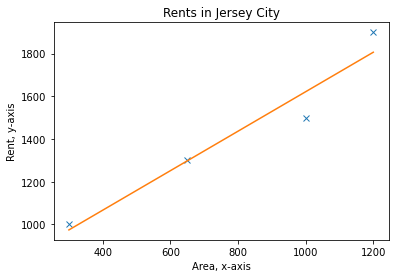

In [1]:
import numpy as np
import matplotlib.pyplot as plt
house_area = np.array([300, 650, 1000, 1200])
rent = np.array([ 1000, 1300, 1500, 1900 ])

plt.plot(house_area, rent, 'x')
plt.title('Rents in Jersey City')
plt.xlabel('Area, x-axis')
plt.ylabel('Rent, y-axis')
slope, intercept = np.polyfit(house_area, rent, 1)

# y = mx + c is a first degree polynomial or a linear equation
plt.plot(house_area, slope*house_area + intercept)
plt.show()

In [2]:
# Run the cell above to get slope and intercept
predict_rent = lambda area: slope * area + intercept

predict_rent(400)

1066.7549668874171

Predict rent for a house of area 990 sqft

In [3]:
# Add your code here

Assume that there are no other factors that influence the rent other than the area of the house.
### Why is the 990 sqft more than 1000 sqft?
let's promote our equation to next degree. A second degree polynomial can be represented by the equation $$y = ax^2 + bx + c$$

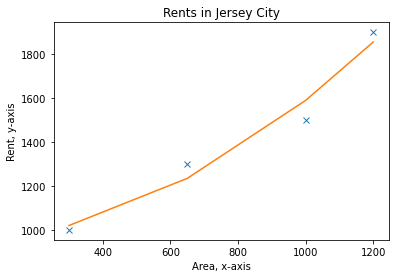

In [4]:
a_2, b_2, c_2 = np.polyfit(house_area, rent, 2)

plt.plot(house_area, rent, 'x')
plt.title('Rents in Jersey City')
plt.xlabel('Area, x-axis')
plt.ylabel('Rent, y-axis')

plt.plot(house_area, a_2*(house_area**2) + b_2*house_area + c_2)
plt.show()

In [5]:
predict_rent_2 = lambda area: a_2*(area**2) + b_2*area + c_2

predict_rent_2(990)

1577.6586457750436

Let's compare both the models

In [6]:
# calculate difference between rent-predictions of 990 sqft house by model 1 and 2

The second degree model had the flexibility and predicted closer to what we are expecting. But we want to save more money and yes the model can be improved.
### As curious as Curious George?
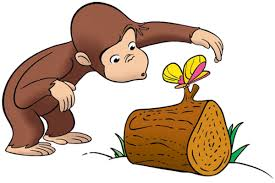

Want to go for a 3rd degree polynomial? What are you waiting for? start coding! $$y = ax^3 + bx^2 + cx + d$$

In [7]:
# 5 minutes
# your code here
# plot and write the lambda function to predict

Thinking about taking over zillow? Not just yet.
### So far so good, the model is doing well. But how did we even get there?
We found the values for the variables $a, b,c, d$. How do we calculate those values? Let's take a deep breath and look at this flow first:

Step 1: Initialize the equation with random values for $a, b(, c, d)$<br />
Step 2: Substitute value of x and calculate y, let's consider this y value to be y_pred and actual y value to be y_actual<br />
Step 3: Repeat Step 2,calculate Y_preds for all the Ys' using their respective Xs'<br />
Step 4: Given cost function, $f(cost)$. Calculate cost using the y_preds and y_actuals <br /> 
Step 5: Is the cost 0 or closer to 0? If it is a Yes, then we found ABCDs. It it is a No, then repeat from Step 2 now by adjusting ABCD, given a $f(ABCD)$<br />

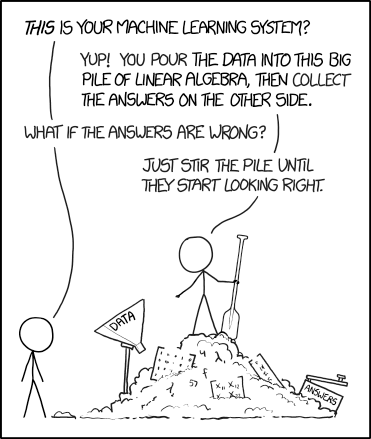

Do not worry about those functions yet. Understand the flow and familiarize yourself with it. Every complex algorithm follows a similar flow except the equations in Step 1, Step 4 and Step 5 will differ which we will look into, later.

### Cost function
$$f(cost) = {\frac{1}{n}\Sigma_{i=1}^{n}{(y_{pred} - y_{actual})^2}},$$
$y_{pred} = ax + b$<br />
$n$ is the total number of data points

In [156]:
def cost_function(X, Y, a, b):
    """
    Parameters
    ----------
    X : list
        The input values that will be substituted to find y. 
    
    Y : list
        The values of the function at each data point.
        
    a, b: float
    
    Returns
    -------
    cost : float
        The value of the regression cost function.
    """
    predict_y = lambda x: a*x + b
    cost = 0.0
    for i in range(len(Y)):
        # Write the equation here to calculate cost for each data point and
        # add it to cost variable
        cost += (predict_y(X[i]) - Y[i]) ** 2
        # ******Remove*********
    return cost/len(Y)


cost_function(house_area.tolist(), rent.tolist(), 0.92450331, 696.95364238)
cost_function(house_area.tolist(), rent.tolist(), 1.8482632809705084, 0.0026302286012363603)
# Calculate cost for your choice of a, b, c, d
# Calculate cost for a, b, c, d obtained from np.polyfit

107643.78171253277

So close!!

We have written a function to validate our model. But without the help of polyfit, can you identify the best values for abcd where the error is 0 or close to 0.

### Introducing Gradient Descent
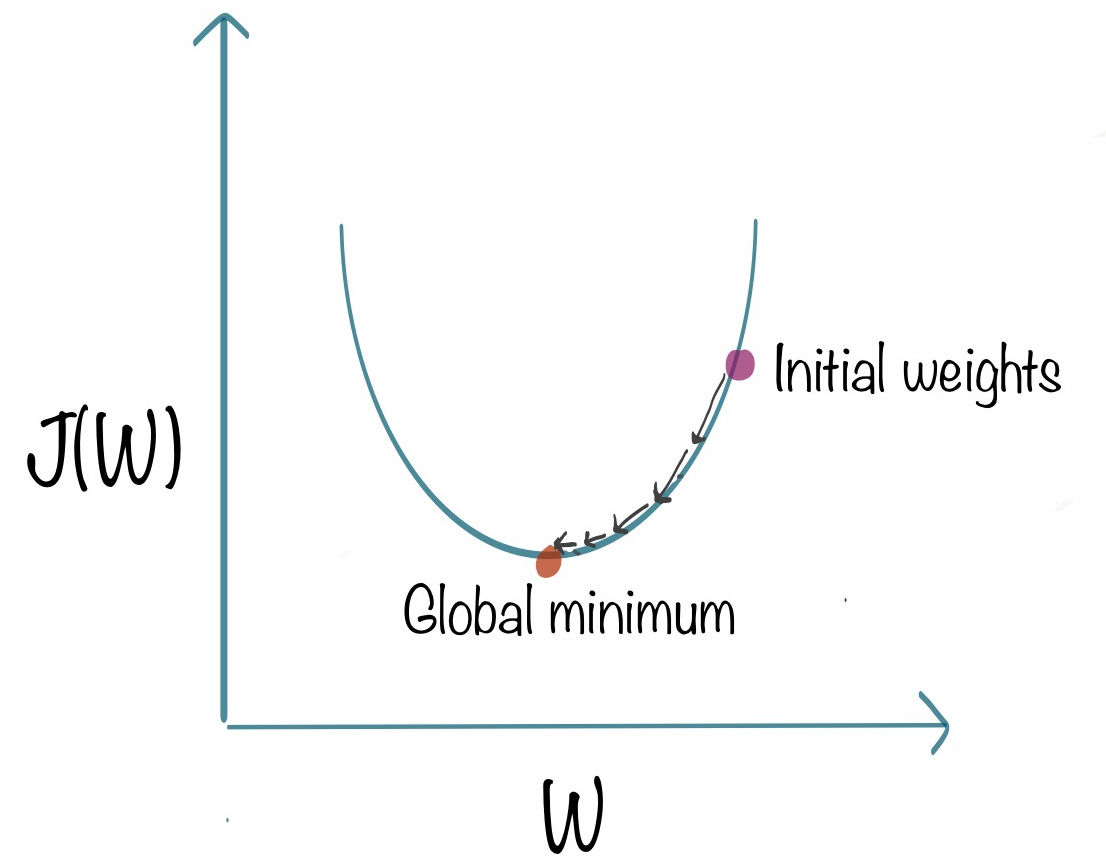

The idea is to reduce our error to the global minimum, by reducing the values of variables abcd. The above curve is the cost function curve. The arrow is pointing to a negative gradient direction. At any point on the curve, we choose our direction based on this gradient and how many points do we move in that direction? That will be controlled by a variable called learning_rate. Learning rate decides the rate at which you will attain global minimum. Lower learning rate means more precision but we are trading off computing time.

In [159]:
def update_variables(X, Y, a, b, learning_rate):
    predict_y = lambda x, a, b: a*x + b
    a_deriv = b_deriv = 0
    n = len(X)
    for i in range(n):
        # Calculate partial derivatives
        
        y_pred = predict_y(X[i], a, b)
        
                 # -2x(y - (ax + b))
        a_deriv += -2*X[i] * (Y[i] - y_pred)

                 # -2(y - (ax + b))
        b_deriv += -2 * (Y[i] - y_pred)

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / n) * learning_rate
    b -= (b_deriv / n) * learning_rate

    return a, b

In [157]:
def train(X, Y, a, b, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        a, b = update_variables(X, Y, a, b, learning_rate)

        cost = cost_function(X, Y, a, b)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    a={:.3f}    b={:.3f}    cost={:.2}".format(i, a, b, cost))

In [176]:
train([0.0, 1.0, 2.0, 3.0,  4.0,  5.0], [0.0, 0.8, 0.9, 0.1, -0.8, -1.0], 0.0, 0.0, 0.1, 500)

iter=0    a=-0.177    b=0.000    cost=0.49
iter=10    a=-0.253    b=0.340    cost=0.34
iter=20    a=-0.290    b=0.526    cost=0.29
iter=30    a=-0.306    b=0.629    cost=0.27
iter=40    a=-0.313    b=0.685    cost=0.26
iter=50    a=-0.315    b=0.716    cost=0.25
iter=60    a=-0.314    b=0.733    cost=0.25
iter=70    a=-0.313    b=0.743    cost=0.25
iter=80    a=-0.311    b=0.749    cost=0.25
iter=90    a=-0.310    b=0.752    cost=0.25
iter=100    a=-0.308    b=0.754    cost=0.25
iter=110    a=-0.307    b=0.755    cost=0.25
iter=120    a=-0.306    b=0.756    cost=0.25
iter=130    a=-0.305    b=0.756    cost=0.25
iter=140    a=-0.305    b=0.756    cost=0.25
iter=150    a=-0.304    b=0.757    cost=0.25
iter=160    a=-0.304    b=0.757    cost=0.25
iter=170    a=-0.304    b=0.757    cost=0.25
iter=180    a=-0.304    b=0.757    cost=0.25
iter=190    a=-0.303    b=0.757    cost=0.25
iter=200    a=-0.303    b=0.757    cost=0.25
iter=210    a=-0.303    b=0.757    cost=0.25
iter=220    a=-0.303 

In [177]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
np.polyfit(x, y, 1)

array([-0.30285714,  0.75714286])

### How can you decide what equation(ML algorithm) to use?